# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
import datetime
import datacompy
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load and view our current datasets

In [2]:
df_sy = pd.read_csv("data/semiyearly_data.csv")
df_mon = pd.read_csv("data/monthly_data.csv")
df_baseline = pd.read_csv("data/baseline_data.csv")

In [3]:
conflict = pd.read_csv("data/conflict.csv")
conflict = conflict[["date", "district", "n_conflict_total"]]
conflict = conflict[(conflict.date=='2017-07-01')|(conflict.date=='2018-01-01')|(conflict.date=='2018-07-01')|(conflict.date=='2019-01-01')|
(conflict.date=='2019-07-01')| (conflict.date=='2020-01-01')| (conflict.date=='2020-07-01')|(conflict.date=='2021-01-01')|(conflict.date=='2021-07-01')].sort_values(by="date")

# Explore data

In [4]:
df_sy = df_sy.iloc[:,4:]

In [5]:
df_sy.district.unique()

array(['Adan Yabaal', 'Lughaye', 'Buuhoodle', 'Luuq', 'Burtinle', 'Marka',
       'Owdweyne', 'Bulo Burto', 'Qandala', "Bu'aale", 'Qansax Dheere',
       'Bossaso', 'Qardho', 'Borama', 'Qoryooley', 'Berbera',
       'Rab Dhuure', 'Belet Xaawo', 'Saakow', 'Belet Weyne', 'Sheikh',
       'Taleex', 'Baraawe', 'Tayeeglow', 'Bandarbeyla', 'Waajid',
       'Banadir', 'Buur Hakaba', 'Wanla Weyn', 'Laas Caanood',
       'Kurtunwaarey', 'Eyl', 'Galdogob', 'Doolow', 'Garbahaarey',
       'Diinsoor', 'Garoowe', 'Dhuusamarreeb', 'Gebiley', 'Ceerigaabo',
       'Hargeysa', 'Ceel Waaq', 'Hobyo', 'Ceel Dheer', 'Iskushuban',
       'Ceel Buur', 'Jalalaqsi', 'Ceel Barde', 'Jamaame', 'Ceel Afweyn',
       'Jariiban', 'Caynabo', 'Jilib', 'Caluula', 'Jowhar', 'Cadale',
       'Kismaayo', 'Cadaado', 'Cabudwaaq', 'Balcad', 'Burco', 'Gaalkacyo',
       'Baki', 'Zeylac', 'Laasqoray', 'Badhaadhe', 'Xudur', 'Afgooye',
       'Xarardheere', 'Baardheere', 'Afmadow', 'Baidoa', 'Xudun',
       'Laasqoray/Badhan', '

In [6]:
np.sort(df_sy.columns)

array(['AWD/Cholera deaths', 'AWD/cholera cases', 'Average of centx',
       'Average of centy', 'GAM', 'GAM Prevalence',
       'Insecurity - Fatalities', 'Insecurity - Incidents', 'MAM',
       'MAM_admissions', 'Maize prices', 'Malaria Cases', 'Measles Cases',
       'New Admissions (GAM)', 'Price of water', 'SAM', 'SAM Prevalence',
       'SAM/GAM ratio', 'SAM_admissions', 'Sorghum prices',
       'Total alarms', 'Under-Five Population', 'Unnamed: 0.1_x.1',
       'Unnamed: 0.1_x.2', 'Unnamed: 0.1_y', 'Unnamed: 0.1_y.1',
       'Unnamed: 0.1_y.2', 'Unnamed: 0_x.1', 'Unnamed: 0_x.2',
       'Unnamed: 0_y', 'Unnamed: 0_y.1', 'Unnamed: 0_y.2', 'area_phase_x',
       'area_phase_y', 'date', 'district', 'district_encoded',
       'district_x', 'district_y', 'increase', 'increase_numeric',
       'level1_name_x', 'level1_name_y', 'month', 'ndvi_score',
       'next_prevalence', 'phase1_n_x', 'phase1_n_y', 'phase1_perc_x',
       'phase1_perc_y', 'phase2_n_x', 'phase2_n_y', 'phase2_perc_x

In [7]:
df_sy.isnull().sum().sort_values(ascending=False)

AWD/Cholera deaths       644
AWD/cholera cases        353
Price of water           301
MAM_admissions           282
SAM_admissions           282
                        ... 
GAM Prevalence             0
SAM                        0
GAM                        0
Under-Five Population      0
district_encoded           0
Length: 105, dtype: int64

In [8]:
water_price = df_sy[["date","district","Price of water"]]
water_price

,date,district,Price of water
0,2017-07-01,Adan Yabaal,15.0000
1,2017-07-01,Lughaye,4.5000
2,2017-07-01,Buuhoodle,NaN
3,2017-07-01,Luuq,15.0000
4,2017-07-01,Burtinle,85.0000
...,...,...,...
672,2021-07-01,Jariiban,NaN
673,2021-07-01,Caluula,35.0000
674,2021-07-01,Qoryooley,20.1805
675,2021-07-01,Baki,NaN


In [9]:
merged_water_conflict = water_price.merge(conflict, how="outer")
merged_water_conflict = merged_water_conflict.iloc[:-11]
merged_water_conflict.info()
merged_water_conflict.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 676
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              677 non-null    object 
 1   district          677 non-null    object 
 2   Price of water    376 non-null    float64
 3   n_conflict_total  359 non-null    float64
dtypes: float64(2), object(2)
memory usage: 26.4+ KB


,Price of water,n_conflict_total
Price of water,1.000000,0.398885
n_conflict_total,0.398885,1.000000


In [10]:
merged_water_conflict.isna().sum()

date                  0
district              0
Price of water      301
n_conflict_total    318
dtype: int64

<AxesSubplot:>

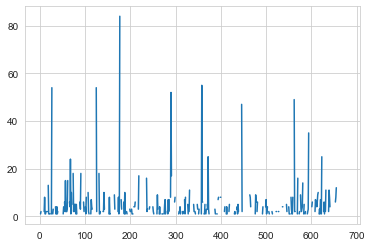

In [11]:
merged_water_conflict["n_conflict_total"].plot()

<AxesSubplot:>

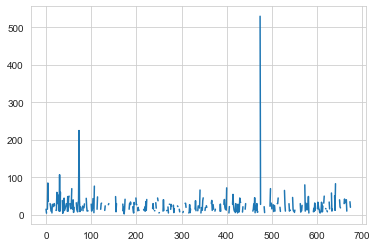

In [12]:
merged_water_conflict["Price of water"].plot()

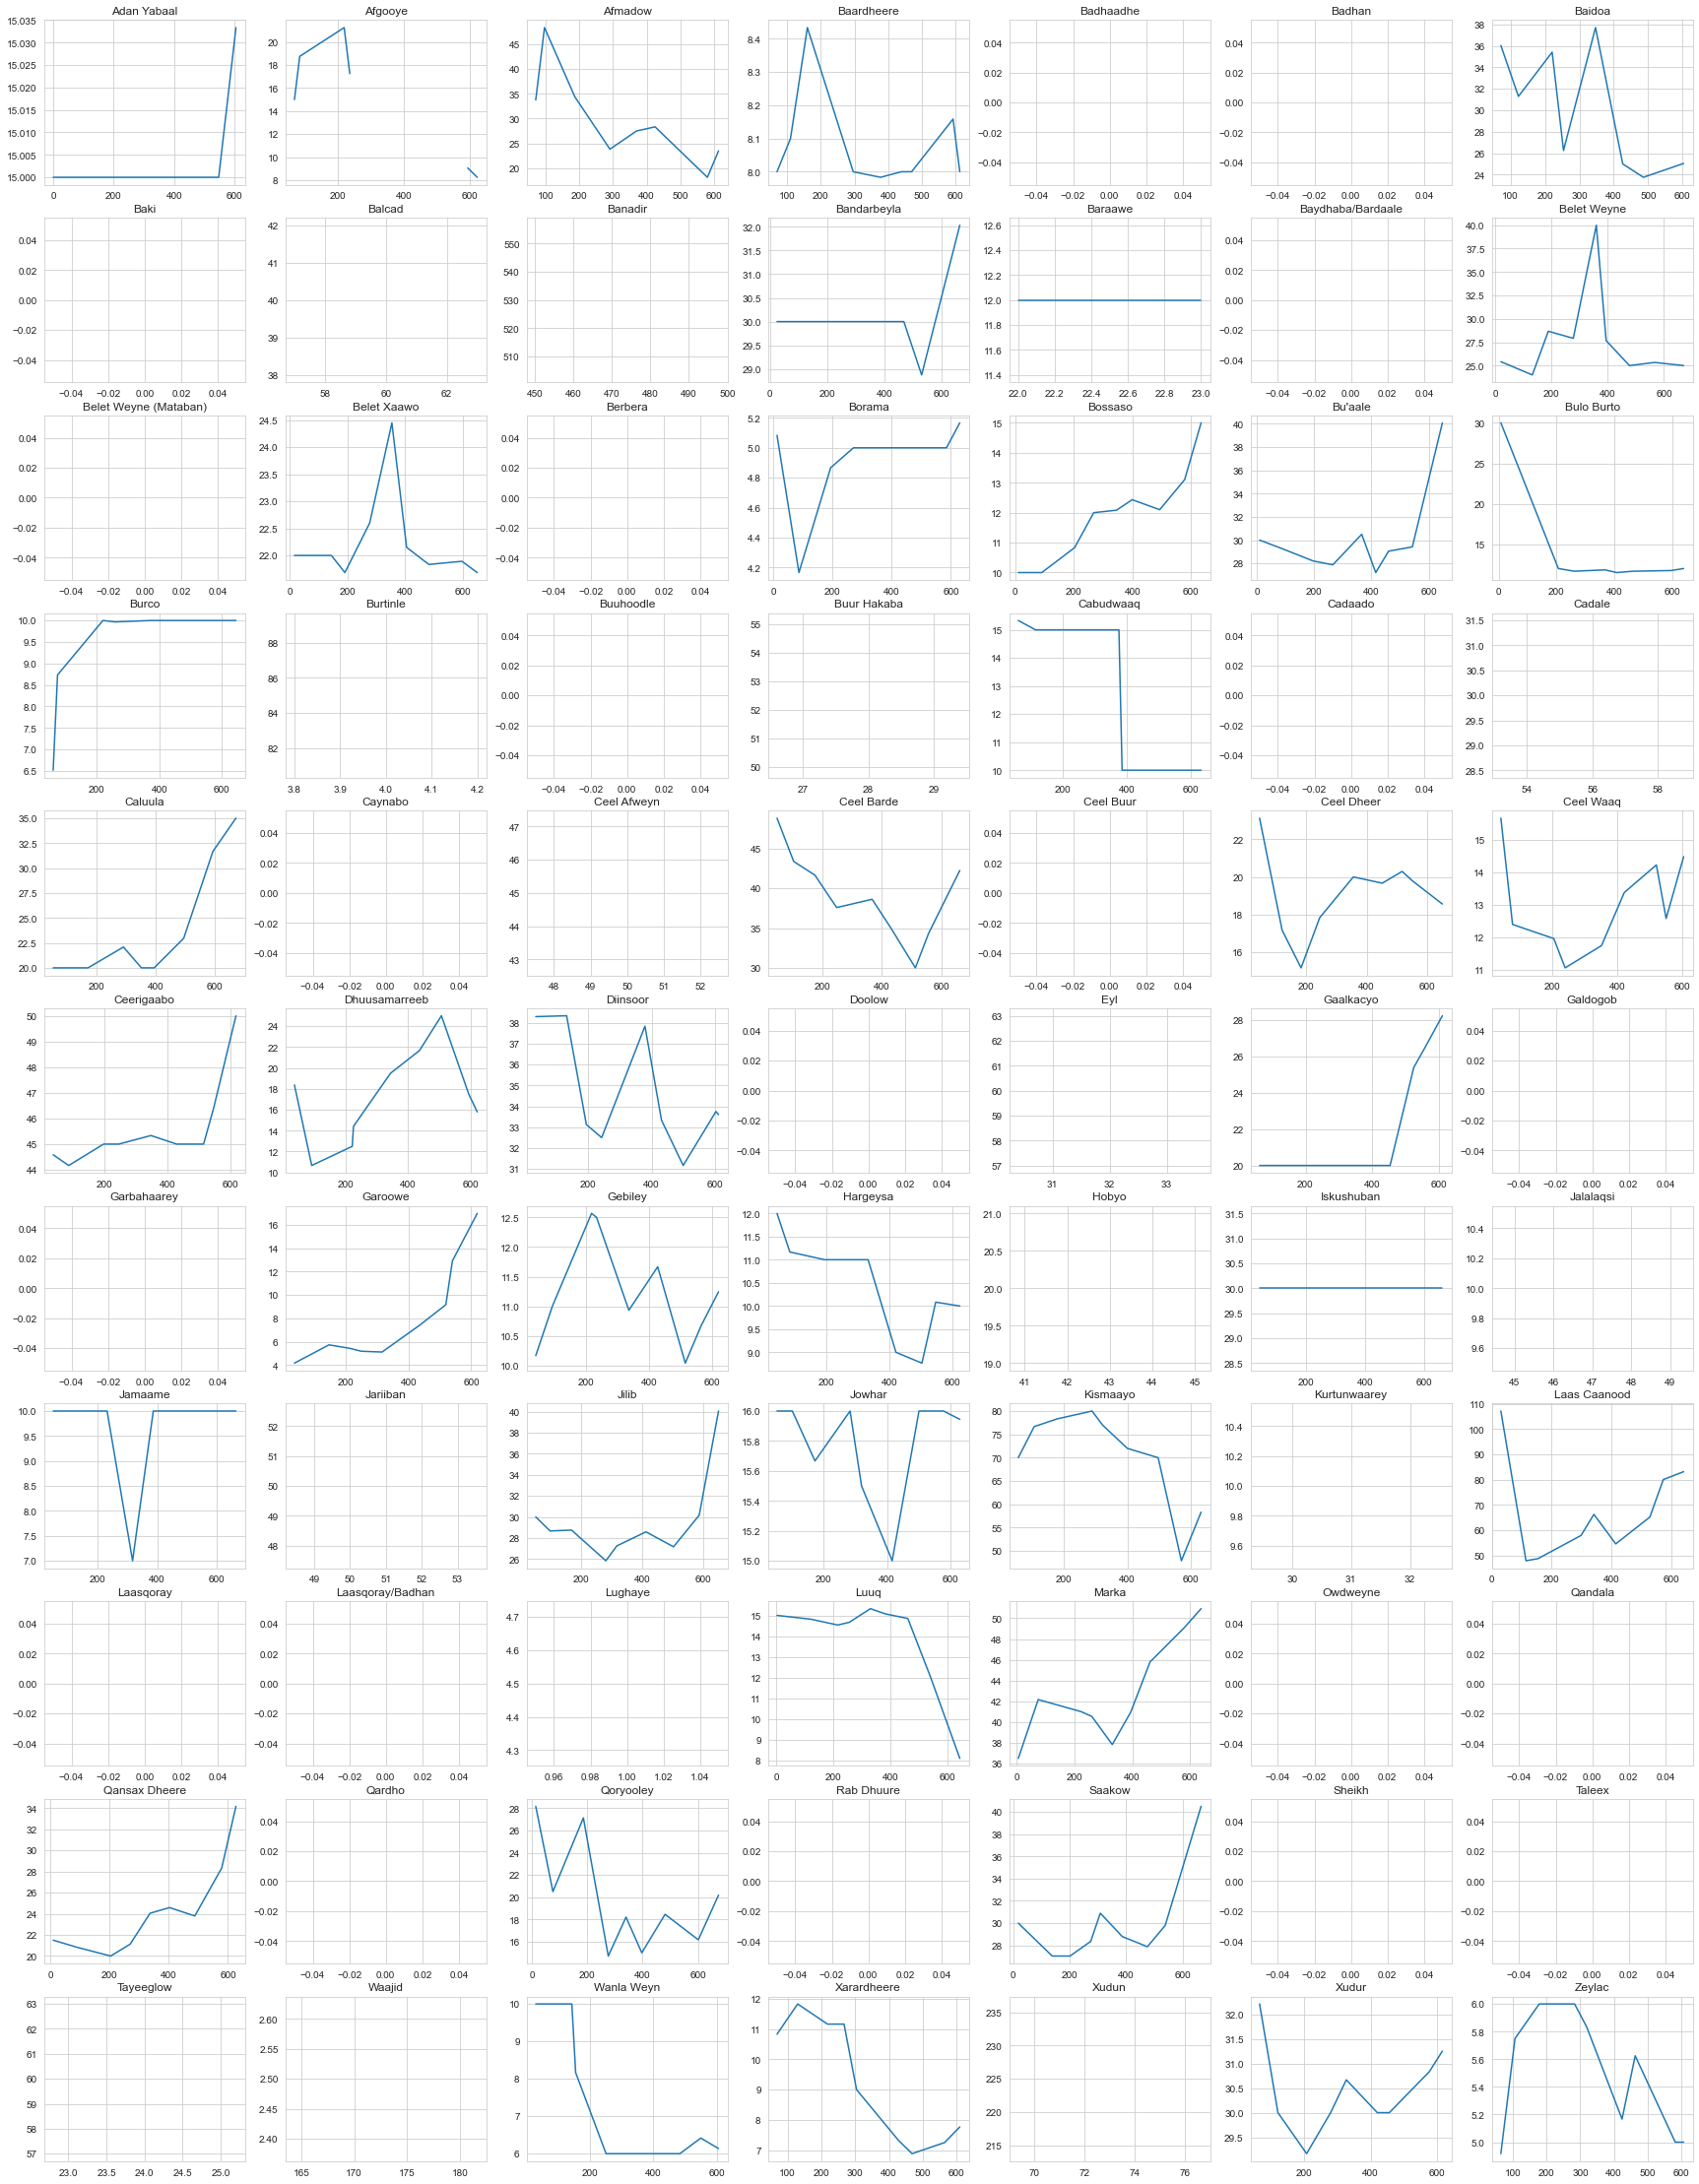

In [13]:

districts = np.sort(df_sy.district_x.unique())
fig, ax = plt.subplots(nrows=11, ncols=7, figsize=(30,40))
axs = ax.ravel()
data = np.arange(0,77)

for ax, d in zip(axs.ravel(), data):
    ax.plot(merged_water_conflict[merged_water_conflict.district == districts[d]]["Price of water"])
    ax.set_title(districts[d])


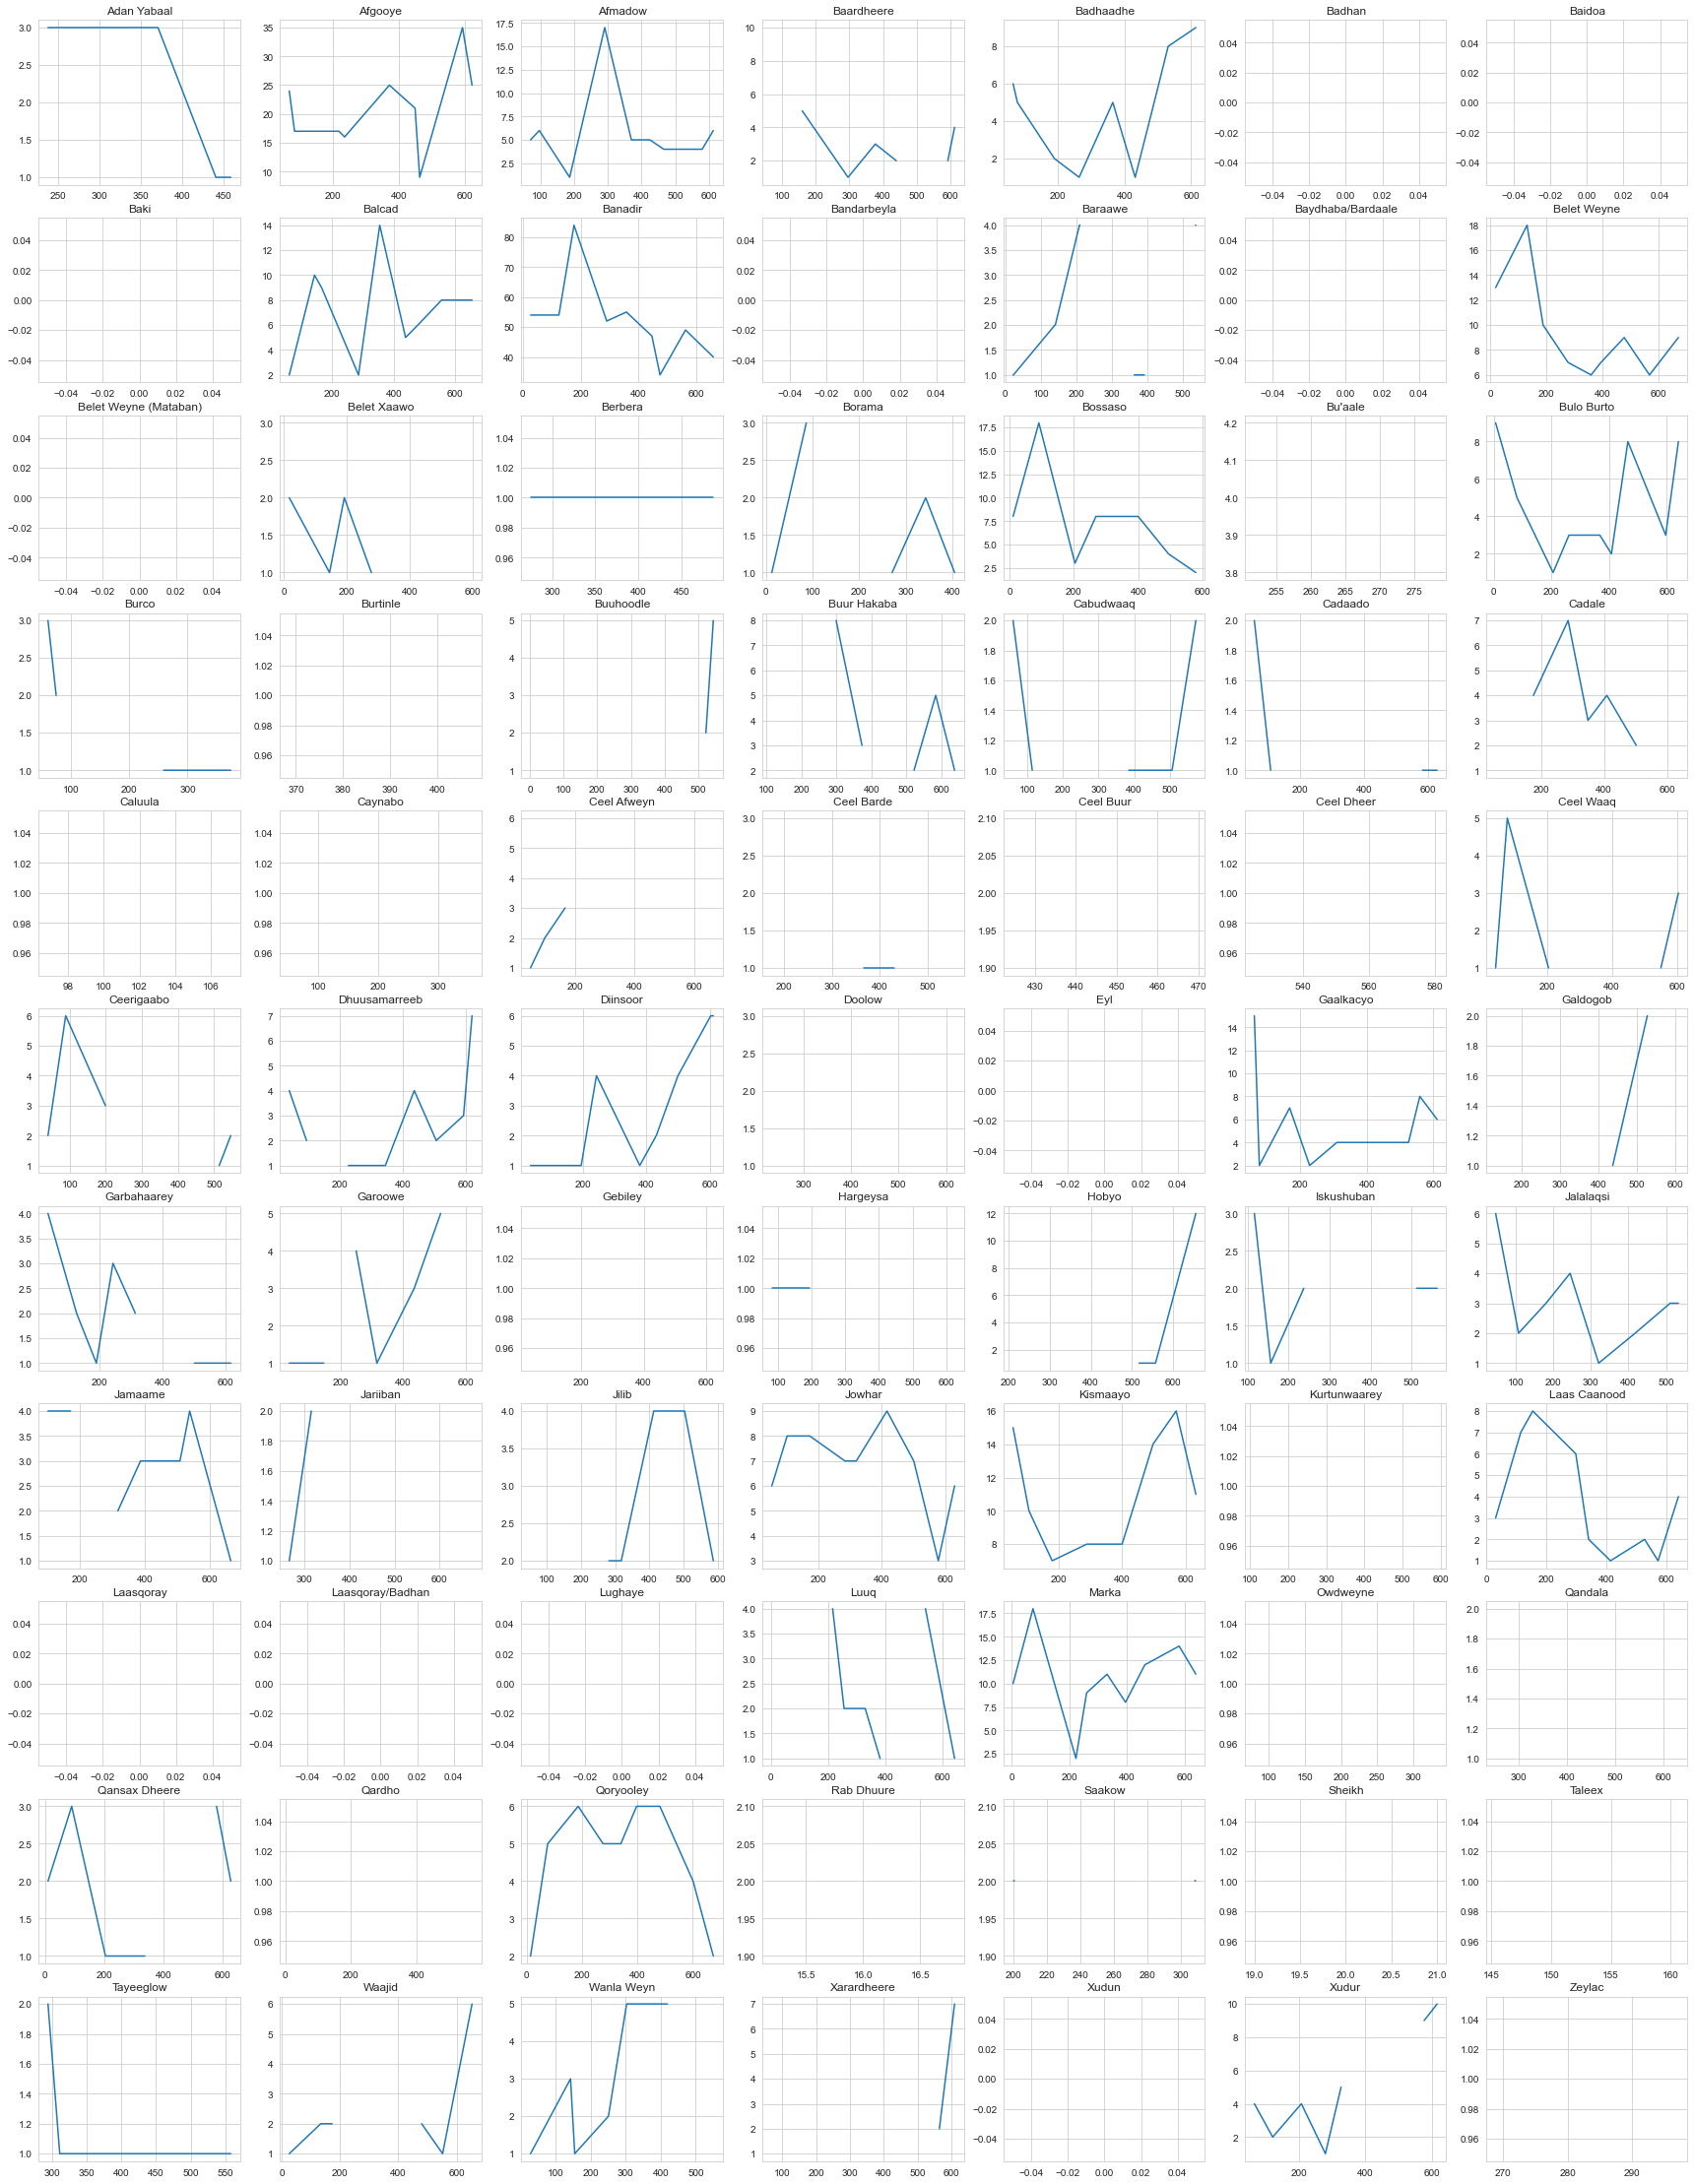

In [14]:

districts = np.sort(df_sy.district_x.unique())
fig, ax = plt.subplots(nrows=11, ncols=7, figsize=(30,40))
axs = ax.ravel()
data = np.arange(0,77)

for ax, d in zip(axs.ravel(), data):
    ax.plot(merged_water_conflict[merged_water_conflict.district == districts[d]]["n_conflict_total"])
    ax.set_title(districts[d])


# Figuring out which districts have missing values for `price of water`

In [15]:
districts_missing_water = merged_water_conflict.groupby("district").describe()["Price of water"]["count"].reset_index().sort_values("count")

In [16]:
districts_missing_water

,district,count
38,Doolow,0.0
62,Qandala,0.0
23,Buuhoodle,0.0
29,Caynabo,0.0
64,Qardho,0.0
...,...,...
44,Gebiley,9.0
45,Hargeysa,9.0
28,Caluula,9.0
76,Zeylac,9.0


# Exploring which districts have missing values for certain features

In [17]:
# Which districts have misisng values for ipc
df_sy[df_sy.phase3plus_perc_x.isna()][["date", "district"]].district.unique()

array(['Rab Dhuure', 'Laasqoray/Badhan', 'Baydhaba/Bardaale', 'Badhan',
       'Belet Weyne (Mataban)'], dtype=object)

In [18]:
# Which districts have missing values for ipc
districts_missing_ipc = df_sy[df_sy.phase3plus_perc_x.isna()][["date", "district"]].district.unique()

In [19]:
df_sy[df_sy.phase3plus_perc_x.isna()][["date", "district"]]

,date,district
16,2017-07-01,Rab Dhuure
144,2018-01-01,Rab Dhuure
159,2018-07-01,Laasqoray/Badhan
169,2018-07-01,Baydhaba/Bardaale
197,2018-07-01,Badhan
227,2019-01-01,Belet Weyne (Mataban)
246,2019-01-01,Badhan
249,2019-01-01,Baydhaba/Bardaale
300,2019-01-01,Laasqoray/Badhan
306,2019-07-01,Badhan


In [20]:
df_sy[df_sy["district"]=="Laasqoray"][["date","phase3plus_perc_x"]]

,date,phase3plus_perc_x
65,2017-07-01,0.35
117,2018-01-01,0.33
151,2018-07-01,0.15
225,2019-01-01,0.14
338,2019-07-01,0.14
445,2020-01-01,0.08


In [21]:
df_sy[df_sy.phase3plus_perc_x.isna()][["date", "district"]]

,date,district
16,2017-07-01,Rab Dhuure
144,2018-01-01,Rab Dhuure
159,2018-07-01,Laasqoray/Badhan
169,2018-07-01,Baydhaba/Bardaale
197,2018-07-01,Badhan
227,2019-01-01,Belet Weyne (Mataban)
246,2019-01-01,Badhan
249,2019-01-01,Baydhaba/Bardaale
300,2019-01-01,Laasqoray/Badhan
306,2019-07-01,Badhan


In [22]:
# Which districts have misisng values for ndvi_score
df_sy[df_sy.ndvi_score.isna()][["date", "district"]].district.unique()

array(['Banadir', 'Laasqoray/Badhan', 'Baydhaba/Bardaale', 'Badhan',
       'Belet Weyne (Mataban)'], dtype=object)

In [23]:
df_sy[df_sy.ndvi_score.isna()][["date", "district"]]

,date,district
27,2017-07-01,Banadir
125,2018-01-01,Banadir
159,2018-07-01,Laasqoray/Badhan
169,2018-07-01,Baydhaba/Bardaale
177,2018-07-01,Banadir
197,2018-07-01,Badhan
227,2019-01-01,Belet Weyne (Mataban)
246,2019-01-01,Badhan
249,2019-01-01,Baydhaba/Bardaale
290,2019-01-01,Banadir


# Data correction

In [24]:
df_sy_subset = df_sy[['date', 'district', 'GAM Prevalence', 'next_prevalence', 'ndvi_score', 'phase3plus_perc_x', 'total population', "rainfall", "month", "Total alarms", "district_encoded"]]

In [25]:
df_sy_subset = df_sy_subset.dropna()
df_sy_subset = df_sy_subset.rename(columns={"GAM Prevalence": "prevalence","phase3plus_perc_x": "ipc",
                                            "total population":"population", "Total alarms":"total_alarms",
                                            "ndvi_score":"ndvi"})

In [26]:
df_sy_subset

,date,district,prevalence,next_prevalence,ndvi,ipc,population,rainfall,month,total_alarms,district_encoded
0,2017-07-01,Adan Yabaal,0.369200,0.351000,0.215000,0.18,65262.960,19.156667,7,2.166667,0
1,2017-07-01,Lughaye,0.379600,0.169000,0.090000,0.36,70268.220,5.795000,7,2.666667,58
2,2017-07-01,Buuhoodle,0.340600,0.202800,0.213333,0.37,71317.710,19.540000,7,2.333333,23
3,2017-07-01,Luuq,0.431600,0.392600,0.193333,0.21,100476.765,24.240000,7,7.833333,59
4,2017-07-01,Burtinle,0.452400,0.379600,0.180000,0.22,112734.270,15.903333,7,3.666667,22
...,...,...,...,...,...,...,...,...,...,...,...
598,2021-01-01,Belet Xaawo,0.383533,0.334987,0.310000,0.15,71052.000,13.395000,1,3.666667,15
599,2021-01-01,Qandala,0.355069,0.332171,0.221667,0.14,52515.000,10.923333,1,0.166667,62
600,2021-01-01,Galdogob,0.451946,0.457344,0.226667,0.20,72580.000,11.781667,1,1.166667,41
601,2021-01-01,Qoryooley,0.459391,0.451223,0.511667,0.08,207773.000,19.496667,1,3.833333,65


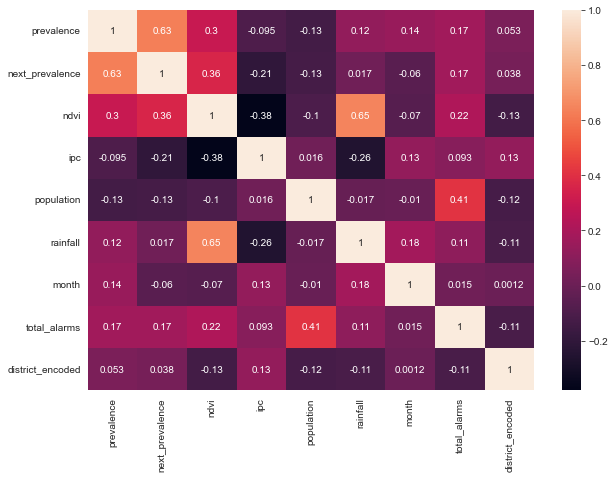

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(df_sy_subset.corr(),annot=True);

In [28]:
df_sy_subset.to_csv("df_sy_subset.csv")

In [29]:
df_sy_subset.district.unique()

array(['Adan Yabaal', 'Lughaye', 'Buuhoodle', 'Luuq', 'Burtinle', 'Marka',
       'Owdweyne', 'Bulo Burto', 'Qandala', "Bu'aale", 'Qansax Dheere',
       'Bossaso', 'Qardho', 'Borama', 'Qoryooley', 'Berbera',
       'Belet Xaawo', 'Saakow', 'Belet Weyne', 'Sheikh', 'Taleex',
       'Baraawe', 'Tayeeglow', 'Bandarbeyla', 'Waajid', 'Buur Hakaba',
       'Wanla Weyn', 'Laas Caanood', 'Kurtunwaarey', 'Eyl', 'Galdogob',
       'Doolow', 'Garbahaarey', 'Diinsoor', 'Garoowe', 'Dhuusamarreeb',
       'Gebiley', 'Ceerigaabo', 'Hargeysa', 'Ceel Waaq', 'Hobyo',
       'Ceel Dheer', 'Iskushuban', 'Ceel Buur', 'Jalalaqsi', 'Ceel Barde',
       'Jamaame', 'Ceel Afweyn', 'Jariiban', 'Caynabo', 'Jilib',
       'Caluula', 'Jowhar', 'Cadale', 'Kismaayo', 'Cadaado', 'Cabudwaaq',
       'Balcad', 'Burco', 'Gaalkacyo', 'Baki', 'Zeylac', 'Laasqoray',
       'Badhaadhe', 'Xudur', 'Afgooye', 'Xarardheere', 'Baardheere',
       'Afmadow', 'Baidoa', 'Xudun', 'Rab Dhuure', 'Banadir'],
      dtype=object)

# Find VIF.
Any feature with VIF above 10 is too correlated with other features to be used as predictors

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_sy_subset)
X = X.drop(["district", "date", "const", 'prevalence', 'next_prevalence'],axis=1)
pd.DataFrame([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).rename(columns={0:"VIF"}).sort_values("VIF")

,VIF
population,2.073303
ipc,2.463621
month,2.801678
district_encoded,3.298449
total_alarms,4.417091
rainfall,5.977261
ndvi,8.815214


# Missing values per district

In [31]:
def count_missing_district(df):

    """ This function shows the total number of missing values in each column
    per district"""

    df = df.groupby('district')
    df = df.count().rsub(df.size(),axis=0)
    return df

def count_missing_district_total(df):

    """This function shows the total number of missing values per district
     """

    df = df.groupby('district')
    df = df.count().rsub(df.size(), axis=0)
    df.reset_index()
    df = df.sum(axis=1)
    return df


In [40]:
count_missing_district(df_sy)

,date,district_x,total population,Under-Five Population,GAM,MAM,SAM,GAM Prevalence,SAM Prevalence,SAM/GAM ratio,...,Unnamed: 0.1_y.2,Unnamed: 0_y.2,MAM_admissions,SAM_admissions,prevalence_6lag,next_prevalence,month,increase,increase_numeric,district_encoded
district,,,,,,,,,,,,,,,,,,,,,
Adan Yabaal,0,0,1,0,0,2,0,0,0,0,...,9,9,9,9,1,1,0,1,1,0
Afgooye,0,0,1,0,0,2,0,0,0,0,...,3,3,3,3,1,1,0,1,1,0
Afmadow,0,0,1,0,0,2,0,0,0,0,...,3,3,3,3,1,1,0,1,1,0
Baardheere,0,0,1,0,0,2,0,0,0,0,...,3,3,3,3,1,1,0,1,1,0
Badhaadhe,0,0,1,0,0,2,0,0,0,0,...,3,3,3,3,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wanla Weyn,0,0,1,0,0,2,0,0,0,0,...,3,3,3,3,1,1,0,1,1,0
Xarardheere,0,0,1,0,0,2,0,0,0,0,...,3,3,3,3,1,1,0,1,1,0
Xudun,0,0,1,0,0,2,0,0,0,0,...,3,3,3,3,1,1,0,1,1,0
